# Interfacing with DAT-CORE

Some useful links

[Platform Docs](http://docs.blackfynn.io/platform/)

[Python API](http://docs.blackfynn.io/clients/python/quickstart.html)


[Authorization](https://github.com/cchorn/Docker_SPARC/tree/master/Dockerfile/Jupyter_Notebooks/Example_Jupyter_Notebooks)


[Blackfynn](https://app.blackfynn.io)


[REST API](https://developer.blackfynn.io/)


In [1]:
from blackfynn import Blackfynn

bf = Blackfynn('guidon')

print "email =", bf.profile.email
print "organization =", bf.context.name

print "my datatsets:"

for ds in bf.datasets():
    print ds.name
    

email = guidon@itis.ethz.ch
organization = IT'IS Foundation
my datatsets:
Practice Dataset
simcore-dataset


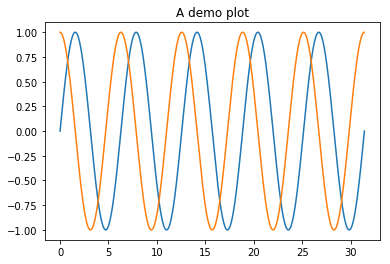

In [2]:
%matplotlib inline  

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 10*np.pi, 500)
y1 = np.sin(x)
y2 = np.cos(x)

plt.plot(x, y1)
plt.plot(x, y2)
plt.title('A demo plot')
plt.show()

# Store to file
np.savetxt("demo.csv", zip(x, y1, y2), delimiter=',', header='x, y1, y2')

In [3]:
# Create a new dataset, delete existing documents first
simcore_dataset = None
try:
    simcore_dataset = bf.get_dataset("simcore-dataset")
    for item in simcore_dataset:
        item.delete()
except:
    print "Dataset not yet there"
    
    simcore_dataset = bf.create_dataset("simcore-dataset")

# Upload file
simcore_dataset.upload("demo.csv")

{u'appendToPackage': False,
 u'bucket': u'prod-uploads-blackfynn',
 u'dataset': u'N:dataset:0b3a4391-fc42-4d49-984c-d8fdf4f38da4',
 u'email': u'guidon@itis.ethz.ch',
 u'encryptionKeyId': u'arn:aws:kms:us-east-1:960751427106:key/ffc48f9e-0486-4098-a480-bd66be2d9c70',
 u'fileGroupPath': u'guidon@itis.ethz.ch/ece27c08-7109-4131-a4d7-dbb645c91e44/',
 u'files': [u'guidon@itis.ethz.ch/ece27c08-7109-4131-a4d7-dbb645c91e44/demo.csv'],
 u'groupId': u'ece27c08-7109-4131-a4d7-dbb645c91e44',
 u'organizationId': u'N:organization:a27ae406-5076-4bc8-ba59-0b90b1a1c224',
 u'session': u'e6776037-1c7d-41ee-93f1-f66009060b69',
 u'userId': u'N:user:1b8e4b82-bc06-4317-ae05-582b1062f1c4'}

In [4]:
simcore_dataset.update()
for item in simcore_dataset:
    print "Type:", item.type, "|", "Name:", item.name, "|" , "ID:", item.id
    tb = bf.get(item.id)

     # get all the data
    data = tb.get_data()

    # print rows and column information for the data
    print("Data has {} rows and {} columns").format(len(data.index),len(data.columns))
    print("First Index: {}").format(data.index[0])
    print("Last Index: {}").format(data.index[len(data.index)-1])
    
    print "\nColumns in the data:"
    print " | ".join(data.columns)

    

Type: Tabular | Name: demo | ID: N:package:2dc27b9b-eea7-4ddf-814a-89d40a25641e
Data has 500 rows and 3 columns
First Index: 0
Last Index: 499

Columns in the data:
# x | y1 | y2


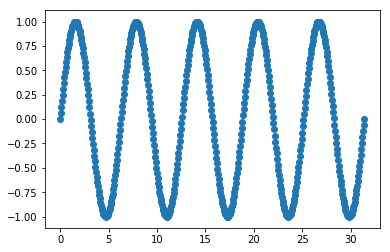

In [5]:
x = data['# x']
y1 = data['y1']

plt.scatter(x, y1)

plt.show()


In [6]:
demo = simcore_dataset[0]
demo.set_property("docker-image-id", "42", category="simcore")

In [7]:
simcore_dataset.update()